# Analyzing Stack Overflow Developer Survey Data¶

## Introduction
In this project, stackoverflow developer servey 2020 dataset is being used to study on the behaviour of the developers across the world. This project mainly focus to answer the three questions as follows.


Questions:

1) What are the major Job Factors the developers evaluate while looking for a job?

2) What programming languages the developers currently working on and are desired to work?

3) Will developers have more Job Satisfaction by having a Master's degree over a Bachelor's degree in some field or by having a CS Major over a Non-CS Major?





While answering each question,standard methodologies like data acquisition, preparation and exploration are followed. Also vivid explanation and visualizations are provided.

------

In [39]:
#importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [40]:
# gathering data 
df=pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


### 1) What are the major Job Factors the developers evaluate while looking for a job?


#### Data cleanup and preparation

In [41]:
df_jobfactors=df[df.JobFactors.notna()]
df_jobfactors.JobFactors

#Split the data categeorized by MainBranch feature
df_jobfactors_non_prof_developers=df_jobfactors[df_jobfactors['MainBranch']!='I am a developer by profession']
df_jobfactors_prof_developers=df_jobfactors[df_jobfactors['MainBranch']=='I am a developer by profession']

#### Data Exploration

In [42]:
#Function to simplify the compact job factor strings of all developers

def getAllJobFactorsWithTotalResponseCount(job_factor_strings):
    '''
    INPUT:
    job_factor_strings - a pandas series holding compacted job factor string responses of developers
    
    OUTPUT:
    X - a pandas series with keys as individual job factors and values as its weights (total response count)
    
    '''
    jobfactors_dict=defaultdict(int)
    for jf in job_factor_strings:
        tmp=jf.split(';')
        for j in tmp:
            jobfactors_dict[j]=jobfactors_dict[j]+1
    
    return pd.Series(jobfactors_dict).sort_values(ascending=False)


In [43]:
#Find all Job factors with its total response count
jobfactors=getAllJobFactorsWithTotalResponseCount(df_jobfactors.JobFactors)
jobfactors

Languages, frameworks, and other technologies I’d be working with         25334
Office environment or company culture                                     21981
Flex time or a flexible schedule                                          21656
Opportunities for professional development                                20421
Remote work options                                                       16411
How widely used or impactful my work output would be                      10277
Industry that I’d be working in                                            7574
Family friendliness                                                        5986
Financial performance or funding status of the company or organization     5892
Specific department or team I’d be working on                              5805
Diversity of the company or organization                                   3387
dtype: int64

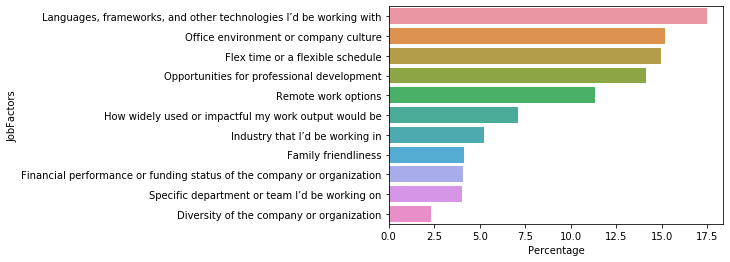

In [44]:
#Plot the Jobfactors Percentage 

jobfactors_perct=(jobfactors*100/jobfactors.sum()).reset_index()
jobfactors_perct.columns=['JobFactors', 'Percentage']
jobfactors_perct

sns_plot=sns.barplot(x='Percentage', y='JobFactors',data=jobfactors_perct)

##### From the chart, the top Job Factor is ‘Languages, Frameworks, and the technologies the developer would be working with’ approximately with 17.5 percent of respondents suggesting this.


In [45]:
#Find all Job factors with its total response count for respondents who are not developer by profession
jobfactors_non_prof_developers=getAllJobFactorsWithTotalResponseCount(df_jobfactors_non_prof_developers.JobFactors)
jobfactors_non_prof_developers

Opportunities for professional development                                4856
Office environment or company culture                                     4555
Languages, frameworks, and other technologies I’d be working with         4466
Flex time or a flexible schedule                                          4344
Remote work options                                                       3019
How widely used or impactful my work output would be                      2513
Industry that I’d be working in                                           2124
Specific department or team I’d be working on                             1523
Family friendliness                                                       1462
Financial performance or funding status of the company or organization    1409
Diversity of the company or organization                                   875
dtype: int64

In [46]:
#Find all different Job factors its total response count for respondents who are developer by profession
jobfactors_prof_developers=getAllJobFactorsWithTotalResponseCount(df_jobfactors_prof_developers.JobFactors)
jobfactors_prof_developers

Languages, frameworks, and other technologies I’d be working with         20868
Office environment or company culture                                     17426
Flex time or a flexible schedule                                          17312
Opportunities for professional development                                15565
Remote work options                                                       13392
How widely used or impactful my work output would be                       7764
Industry that I’d be working in                                            5450
Family friendliness                                                        4524
Financial performance or funding status of the company or organization     4483
Specific department or team I’d be working on                              4282
Diversity of the company or organization                                   2512
dtype: int64

In [47]:
#Plot the job factors differences between professional developers and non professinal developers in percentages
jobfactors_non_prof_developers_perct=pd.DataFrame(jobfactors_non_prof_developers*100/jobfactors_non_prof_developers.sum()).reset_index()
jobfactors_non_prof_developers_perct.columns=['JobFactors','non_professional_developers_%']
jobfactors_non_prof_developers_perct.set_index('JobFactors', inplace=True)
jobfactors_non_prof_developers_perct

jobfactors_prof_developers_perct=pd.DataFrame(jobfactors_prof_developers*100/jobfactors_prof_developers.sum()).reset_index()
jobfactors_prof_developers_perct.columns=['JobFactors','professional_developers_%']
jobfactors_prof_developers_perct.set_index('JobFactors', inplace=True)
jobfactors_prof_developers_perct

comp_df = pd.merge(jobfactors_prof_developers_perct, jobfactors_non_prof_developers_perct, left_index=True, right_index=True) 
comp_df['difference_%'] = comp_df['professional_developers_%'] - comp_df['non_professional_developers_%']
comp_df.style.bar(subset=['difference_%'], align='mid', color=['#d65f5f', '#5fba7d'])

,professional_developers_%,non_professional_developers_%,difference_%
JobFactors,,,
"Languages, frameworks, and other technologies I’d be working with",18.3733,14.3389,4.03436
Office environment or company culture,15.3428,14.6247,0.718089
Flex time or a flexible schedule,15.2424,13.9472,1.29517
Opportunities for professional development,13.7042,15.5911,-1.88685
Remote work options,11.791,9.69306,2.09796
How widely used or impactful my work output would be,6.83583,8.06845,-1.23262
Industry that I’d be working in,4.79846,6.8195,-2.02103
Family friendliness,3.98317,4.69402,-0.710856
Financial performance or funding status of the company or organization,3.94707,4.52386,-0.576788


##### When we separate professional developers and compare the percentage of the responses between the professional and non-professional developers there are some slight differences.
##### The top Job Factor from the responses of non-professional developers is ‘Opportunities for professional development’ which is the fourth preferred job factor by the professional developers.

-----


### 2) What programming languages the developers currently working on and are desired to work?


#### Data cleanup and preparation 

In [48]:
df_languages_current=df[df.LanguageWorkedWith.notna()]
df_languages_desired=df[df.LanguageDesireNextYear.notna()]


#### Data Exploration

In [49]:
#Function to simplify the compact programming language strings of all developers

def getAllLanguagesWithTotalResponseCount(lang_strings):
    '''
    INPUT:
    lang_strings - a pandas series holding compacted programming language string responses of developers
    
    OUTPUT:
    X - a pandas series with keys as individual programming languages and values as its weights (total response count)
    
    '''
    languages_dict=defaultdict(int)
    for lang in lang_strings:
        tmp=lang.split(';')
        for j in tmp:
            languages_dict[j]=languages_dict[j]+1
    
    return pd.Series(languages_dict).sort_values(ascending=False)


In [50]:
#Find different programming languages that developers are currently working, with its total response count
languages_current=getAllLanguagesWithTotalResponseCount(df_languages_current.LanguageWorkedWith)
languages_current

JavaScript               38822
HTML/CSS                 36181
SQL                      31413
Python                   25287
Java                     23074
Bash/Shell/PowerShell    18980
C#                       18041
PHP                      15007
TypeScript               14578
C++                      13707
C                        12487
Go                        5038
Kotlin                    4468
Ruby                      4046
Assembly                  3553
VBA                       3499
Swift                     3397
R                         3288
Rust                      2929
Objective-C               2340
Dart                      2280
Scala                     2052
Perl                      1796
Haskell                   1222
Julia                      519
dtype: int64

In [51]:
#Find different programming languages that developers are desired to work, with its total response count
languages_desired=getAllLanguagesWithTotalResponseCount(df_languages_desired.LanguageDesireNextYear)
languages_desired

Python                   26682
JavaScript               26188
HTML/CSS                 20771
SQL                      19970
TypeScript               17150
C#                       13674
Java                     13264
Go                       12605
Bash/Shell/PowerShell    11728
Rust                     10563
C++                       9756
Kotlin                    9575
PHP                       7106
C                         6091
Swift                     5643
Dart                      4742
R                         4271
Ruby                      4184
Scala                     3465
Haskell                   2996
Assembly                  2469
Julia                     1661
Objective-C               1525
Perl                      1150
VBA                       1055
dtype: int64

In [52]:
#Plot the percentages & differences between developers_worked/working_with and developers_desired_to_work for all programming language
languages_current_perct=pd.DataFrame(languages_current*100/languages_current.sum()).reset_index()
languages_current_perct.columns=['Programming Languages','developers_worked/working_with_%']
languages_current_perct.set_index('Programming Languages', inplace=True)
languages_current_perct

languages_desired_perct=pd.DataFrame(languages_desired*100/languages_desired.sum()).reset_index()
languages_desired_perct.columns=['Programming Languages','developers_desired_to_work_%']
languages_desired_perct.set_index('Programming Languages', inplace=True)
languages_desired_perct

comp_df = pd.merge(languages_current_perct, languages_desired_perct, left_index=True, right_index=True) 
comp_df.sort_values(by='developers_desired_to_work_%',ascending=False,inplace=True)
comp_df['difference_%'] = comp_df['developers_desired_to_work_%'] - comp_df['developers_worked/working_with_%']
comp_df.style.bar(subset=['difference_%'], align='mid', color=['#d65f5f', '#5fba7d'])

,developers_worked/working_with_%,developers_desired_to_work_%,difference_%
Programming Languages,,,
Python,8.78009,11.1976,2.41748
JavaScript,13.4797,10.9902,-2.48943
HTML/CSS,12.5627,8.71691,-3.84576
SQL,10.9071,8.38076,-2.52638
TypeScript,5.06174,7.19729,2.13556
C#,6.26415,5.73853,-0.525619
Java,8.01169,5.56647,-2.44523
Go,1.74928,5.28991,3.54062
Bash/Shell/PowerShell,6.59019,4.92186,-1.66833


##### From this, we can say that JavaScript, HTML/CSS, SQL, Python, Java are the top 5 programming languages in order, that the developers have worked on.
##### But, among these top 5 programming languages, except Python overall desire/interest among the developers for the rest of the four programming languages are diminishing.

##### Also python took the top spot among all the programming languages that developers are desired/ interested to work with.
#### This implies that Python is the most trending programming language currently.

----

### 3. Will developers have more Job Satisfaction by having a Master's degree over a Bachelor's degree in some field or by having a CS Major over a Non-CS Major?

#### Data cleanup and preparation 

In [53]:
df_job_sat=df[df.JobSat.notna()]

#splitting the developers as CS and non CS background based on the primary field of study
df_job_sat_cs=df_job_sat[list(map(lambda x:x in ['Computer science, computer engineering, or software engineering','Web development or web design','Information systems, information technology, or system administration'], df_job_sat.UndergradMajor))]
df_job_sat_non_cs=df_job_sat[list(map(lambda x:x not in ['Computer science, computer engineering, or software engineering','Web development or web design','Information systems, information technology, or system administration'], df_job_sat.UndergradMajor))]

#splitting the developers having bachelors and masters degree based on their highest level of formal education
df_job_sat_bachelors=df_job_sat[list(map(lambda x:x in ['Bachelor’s degree (B.A., B.S., B.Eng., etc.)'], df_job_sat.EdLevel))]
df_job_sat_masters=df_job_sat[list(map(lambda x:x in ['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'], df_job_sat.EdLevel))]


#### Data Exploration

In [54]:
#calculating job satisfaction rating percentage of developers with cs background
df_job_sat_cs_perct=pd.DataFrame(df_job_sat_cs.JobSat.value_counts().sort_values(ascending=False)*100/df_job_sat_cs.shape[0]).reset_index()
df_job_sat_cs_perct.columns=['Rating','Percentage of respondents']
df_job_sat_cs_perct['Category']='CS Major'
df_job_sat_cs_perct

,Rating,Percentage of respondents,Category
0,Very satisfied,31.006746,CS Major
1,Slightly satisfied,30.958095,CS Major
2,Slightly dissatisfied,16.139076,CS Major
3,Neither satisfied nor dissatisfied,13.560586,CS Major
4,Very dissatisfied,8.335496,CS Major


In [55]:
#calculating job satisfaction rating percentage of developers with non cs background
df_job_sat_non_cs_perct=pd.DataFrame(df_job_sat_non_cs.JobSat.value_counts().sort_values(ascending=False)*100/df_job_sat_non_cs.shape[0]).reset_index()
df_job_sat_non_cs_perct.columns=['Rating','Percentage of respondents']
df_job_sat_non_cs_perct['Category']='Non-CS Major'
df_job_sat_non_cs_perct

,Rating,Percentage of respondents,Category
0,Very satisfied,35.169196,Non-CS Major
1,Slightly satisfied,30.531959,Non-CS Major
2,Slightly dissatisfied,14.956134,Non-CS Major
3,Neither satisfied nor dissatisfied,11.154435,Non-CS Major
4,Very dissatisfied,8.188275,Non-CS Major


In [56]:
#concatinating the above two results
df_job_sat_perct1=pd.concat([df_job_sat_cs_perct,df_job_sat_non_cs_perct,], ignore_index=True)
df_job_sat_perct1

,Rating,Percentage of respondents,Category
0,Very satisfied,31.006746,CS Major
1,Slightly satisfied,30.958095,CS Major
2,Slightly dissatisfied,16.139076,CS Major
3,Neither satisfied nor dissatisfied,13.560586,CS Major
4,Very dissatisfied,8.335496,CS Major
5,Very satisfied,35.169196,Non-CS Major
6,Slightly satisfied,30.531959,Non-CS Major
7,Slightly dissatisfied,14.956134,Non-CS Major
8,Neither satisfied nor dissatisfied,11.154435,Non-CS Major
9,Very dissatisfied,8.188275,Non-CS Major


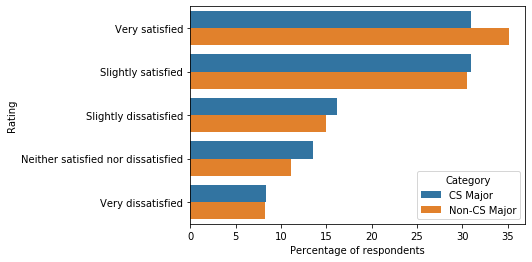

In [57]:
sns.barplot(x='Percentage of respondents', y='Rating', data=df_job_sat_perct1, hue='Category')

##### Here we can see that percentage of respondents with ‘Very Satisfied’ is slightly more for the Non-CS Major category than the CS Major category. But we can observe that overall there is no much difference in Job Satisfaction of developers between the CS and Non-CS Category.

In [58]:
#calculating job satisfaction rating percentage of developers with bachelors degree
df_job_sat_bachelors_perct=pd.DataFrame(df_job_sat_bachelors.JobSat.value_counts().sort_values(ascending=False)*100/df_job_sat_bachelors.shape[0]).reset_index()
df_job_sat_bachelors_perct.columns=['Rating','Percentage of respondents']
df_job_sat_bachelors_perct['Category']="Bachelor's degree"
df_job_sat_bachelors_perct

,Rating,Percentage of respondents,Category
0,Slightly satisfied,31.303438,Bachelor's degree
1,Very satisfied,30.998727,Bachelor's degree
2,Slightly dissatisfied,16.272512,Bachelor's degree
3,Neither satisfied nor dissatisfied,13.343642,Bachelor's degree
4,Very dissatisfied,8.081681,Bachelor's degree


In [59]:
#calculating job satisfaction rating percentage of developers with masters degree
df_job_sat_masters_perct=pd.DataFrame(df_job_sat_masters.JobSat.value_counts().sort_values(ascending=False)*100/df_job_sat_masters.shape[0]).reset_index()
df_job_sat_masters_perct.columns=['Rating','Percentage of respondents']
df_job_sat_masters_perct['Category']="Master's degree"
df_job_sat_masters_perct

,Rating,Percentage of respondents,Category
0,Very satisfied,32.946818,Master's degree
1,Slightly satisfied,30.854403,Master's degree
2,Slightly dissatisfied,15.501308,Master's degree
3,Neither satisfied nor dissatisfied,12.493461,Master's degree
4,Very dissatisfied,8.204010,Master's degree


In [60]:
#concatinating the above two results
df_job_sat_perct2=pd.concat([df_job_sat_masters_perct,df_job_sat_bachelors_perct], ignore_index=True)
df_job_sat_perct2

,Rating,Percentage of respondents,Category
0,Very satisfied,32.946818,Master's degree
1,Slightly satisfied,30.854403,Master's degree
2,Slightly dissatisfied,15.501308,Master's degree
3,Neither satisfied nor dissatisfied,12.493461,Master's degree
4,Very dissatisfied,8.204010,Master's degree
5,Slightly satisfied,31.303438,Bachelor's degree
6,Very satisfied,30.998727,Bachelor's degree
7,Slightly dissatisfied,16.272512,Bachelor's degree
8,Neither satisfied nor dissatisfied,13.343642,Bachelor's degree
9,Very dissatisfied,8.081681,Bachelor's degree


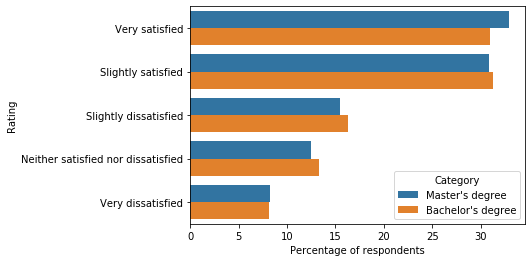

In [61]:
sns.barplot(x='Percentage of respondents', y='Rating', data=df_job_sat_perct2, hue='Category')

##### From this plot We can observe that overall there is no difference in the Job Satisfaction of developers by having a Master’s degree or a Bachelor’s degree.


##### Hence the data suggests no evidence that having a Master’s over a Bachelor’s degree or having CS Major over Non-CS Major will have more Job Satisfaction. The overall Job Satisfaction is the same irrespective of the degree or Major pursued.

--------